In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score

df = pd.read_csv("zoo.csv")
df.info()
list(df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  class_type   101 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 14.3+ KB


['animal_name',
 'hair',
 'feathers',
 'eggs',
 'milk',
 'airborne',
 'aquatic',
 'predator',
 'toothed',
 'backbone',
 'breathes',
 'venomous',
 'fins',
 'legs',
 'tail',
 'domestic',
 'catsize',
 'class_type']

In [ ]:
X = df.iloc[:, 1:-1].values #used all attributes except animal name since its a string
y = df.iloc[:,-1].values

Accuracy range for Decision Tree (entropy) with max depth = 1 : 35% - 85%
Average accuracy: 60%
Accuracy range for Decision Tree (gini) with max depth = 1 : 35% - 88%
Average accuracy: 60%


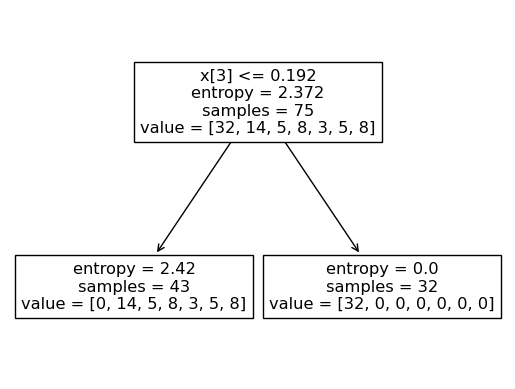

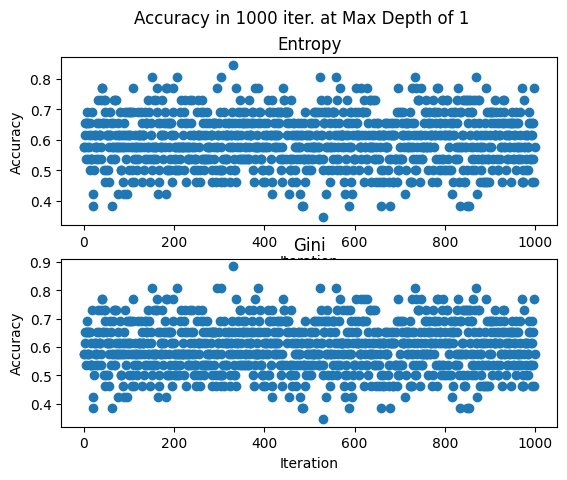

Accuracy range for Decision Tree (entropy) with max depth = 2 : 38% - 88%
Average accuracy: 70%
Accuracy range for Decision Tree (gini) with max depth = 2 : 46% - 92%
Average accuracy: 72%


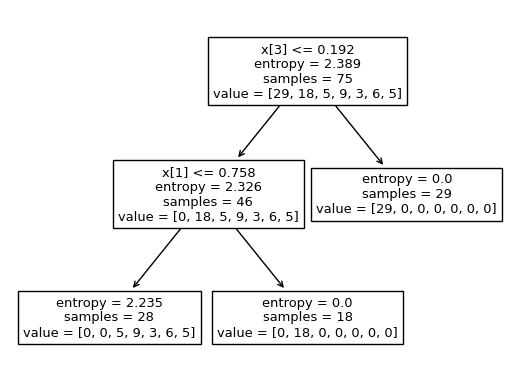

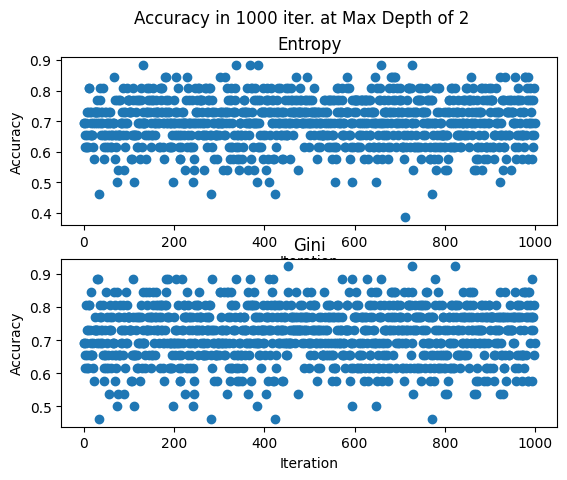

Accuracy range for Decision Tree (entropy) with max depth = 3 : 38% - 100%
Average accuracy: 81%
Accuracy range for Decision Tree (gini) with max depth = 3 : 38% - 100%
Average accuracy: 80%


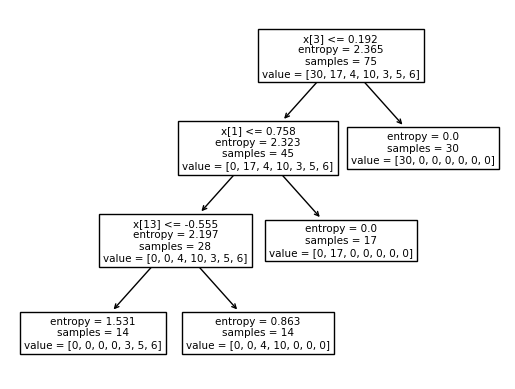

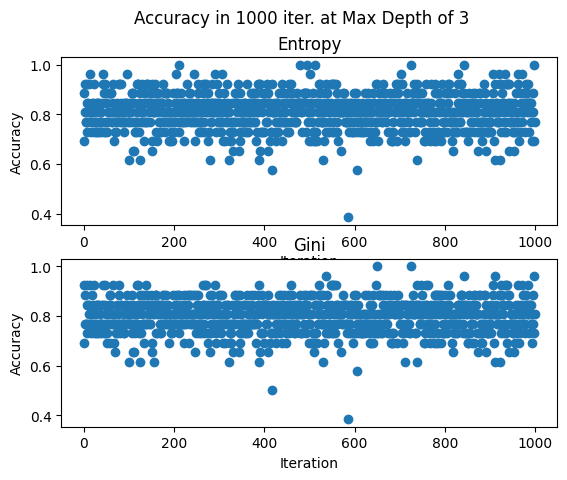

Accuracy range for Decision Tree (entropy) with max depth = 4 : 62% - 100%
Average accuracy: 89%
Accuracy range for Decision Tree (gini) with max depth = 4 : 62% - 96%
Average accuracy: 83%


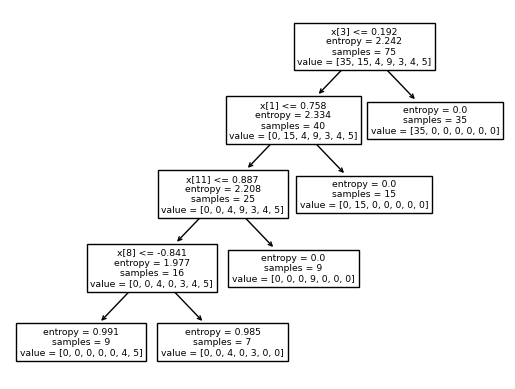

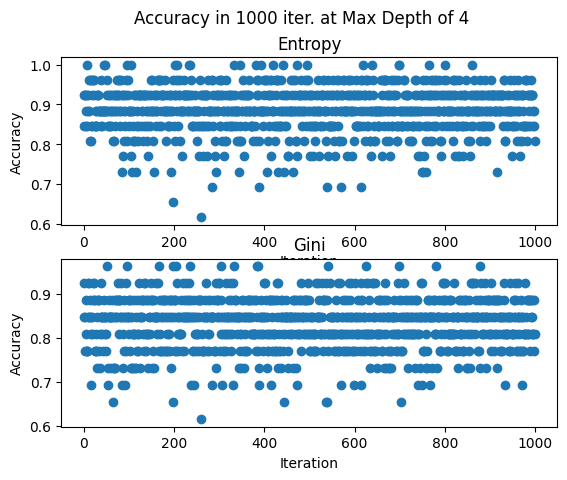

Accuracy range for Decision Tree (entropy) with max depth = 5 : 73% - 100%
Average accuracy: 93%
Accuracy range for Decision Tree (gini) with max depth = 5 : 73% - 100%
Average accuracy: 91%


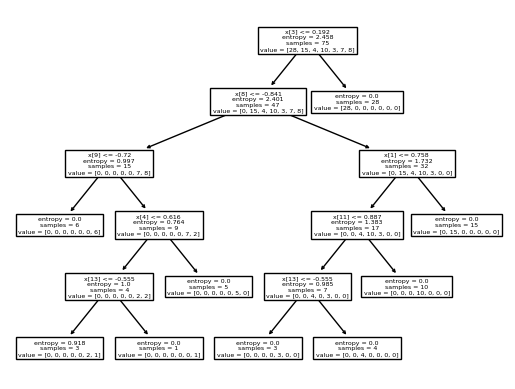

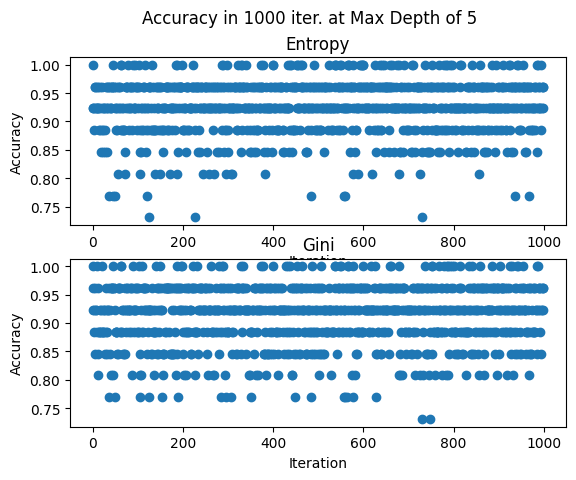

Accuracy range for Decision Tree (entropy) with max depth = 6 : 73% - 100%
Average accuracy: 94%
Accuracy range for Decision Tree (gini) with max depth = 6 : 73% - 100%
Average accuracy: 93%


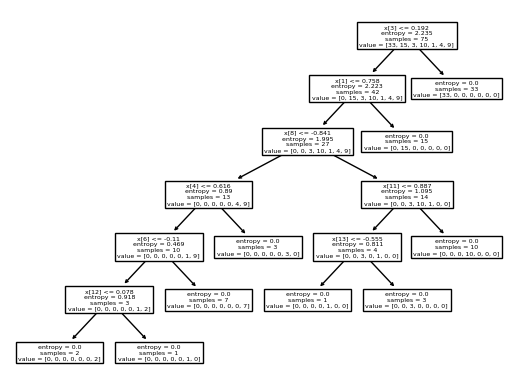

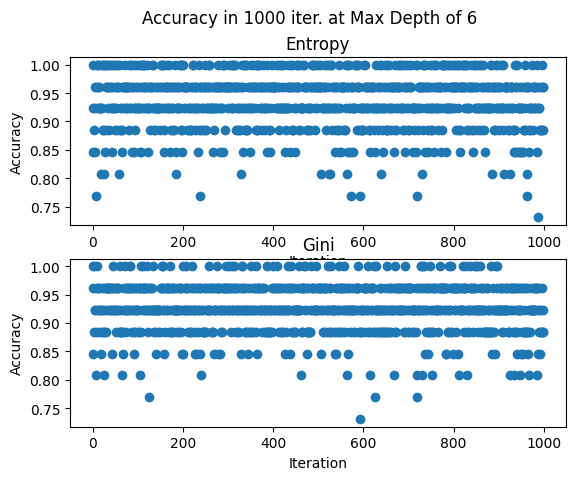

Accuracy range for Decision Tree (entropy) with max depth = 7 : 73% - 100%
Average accuracy: 94%
Accuracy range for Decision Tree (gini) with max depth = 7 : 77% - 100%
Average accuracy: 94%


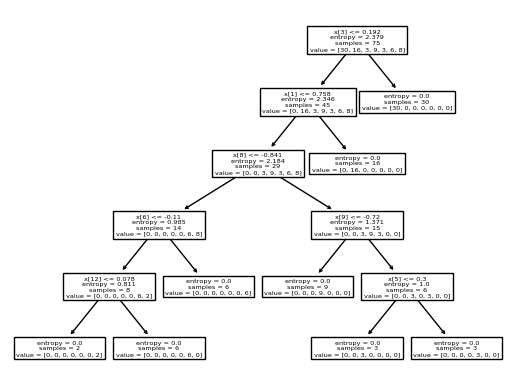

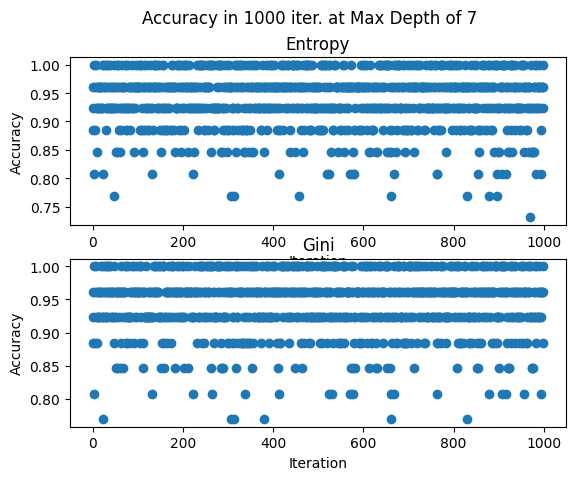

Accuracy range for Decision Tree (entropy) with max depth = 8 : 65% - 100%
Average accuracy: 94%
Accuracy range for Decision Tree (gini) with max depth = 8 : 77% - 100%
Average accuracy: 94%


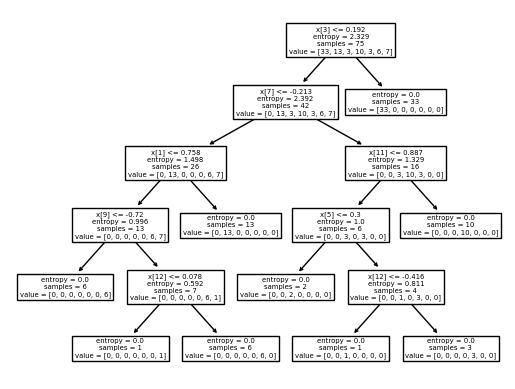

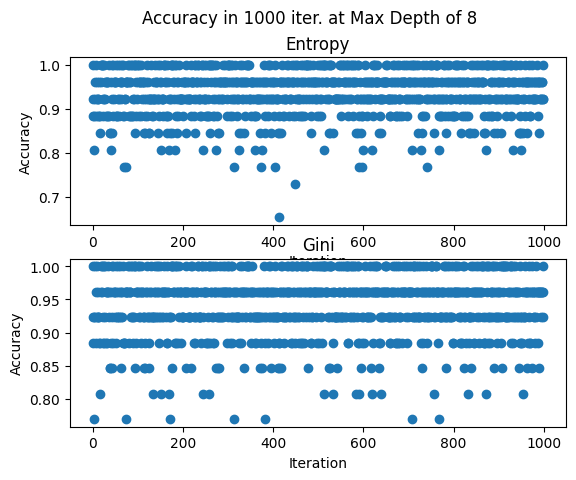

Accuracy range for Decision Tree (entropy) with max depth = 9 : 69% - 100%
Average accuracy: 94%
Accuracy range for Decision Tree (gini) with max depth = 9 : 62% - 100%
Average accuracy: 94%


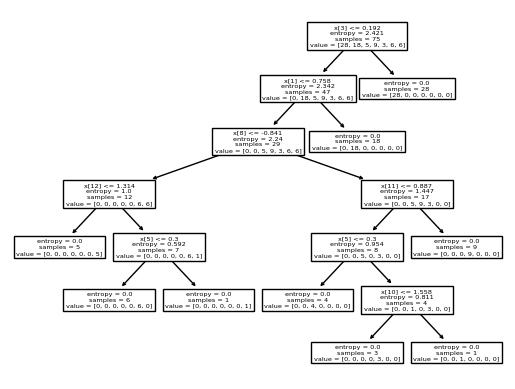

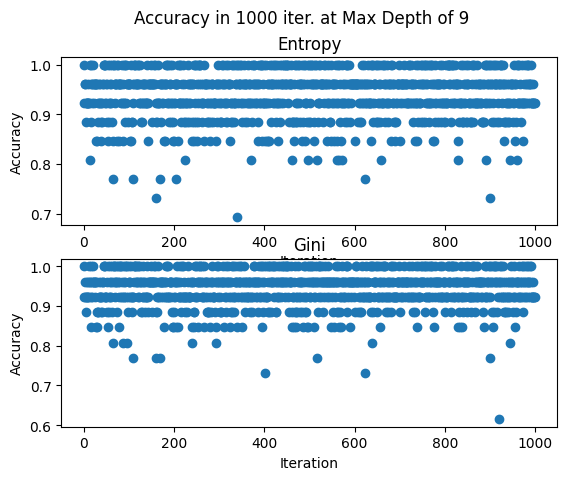

Accuracy range for Decision Tree (entropy) with max depth = 10 : 73% - 100%
Average accuracy: 94%
Accuracy range for Decision Tree (gini) with max depth = 10 : 77% - 100%
Average accuracy: 94%


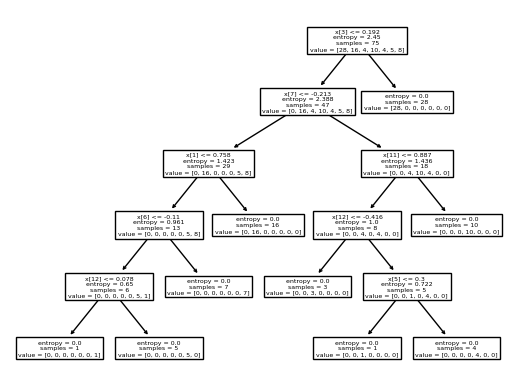

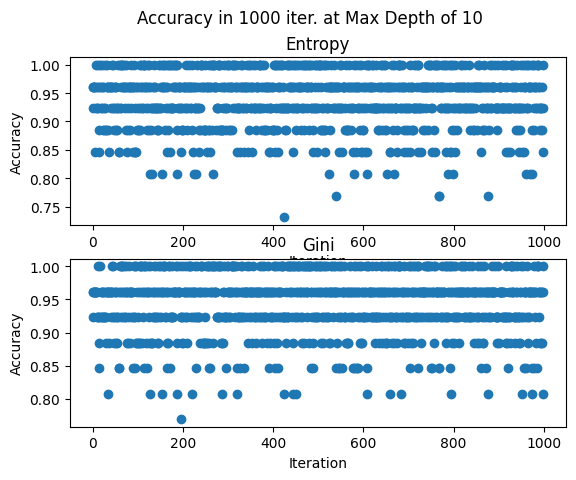

In [ ]:
sc = StandardScaler()
X = sc.fit_transform(X)

avg_acc_entropy = []
avg_acc_gini = []
m_depth = []
for i in range(1, 11):
  acc_entropy = []
  acc_gini = []
  iter = []
  m_depth.append(i)
  for j in range(1000):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)
    clf1 = DecisionTreeClassifier(criterion = 'entropy', max_depth = i, random_state = 0)
    clf2 = DecisionTreeClassifier(criterion = 'gini', max_depth = i, random_state = 0)
    clf1.fit(X_train, y_train)
    clf2.fit(X_train, y_train)
    y_pred1 = clf1.predict(X_test)
    y_pred2 = clf2.predict(X_test)
    accuracy_entropy = accuracy_score(y_test, y_pred1)
    accuracy_gini = accuracy_score(y_test, y_pred2)
    acc_entropy.append(accuracy_entropy)
    acc_gini.append(accuracy_gini)
    iter.append(j)
    plot_tree(decision_tree = clf1)
  print("Accuracy range for Decision Tree (entropy) with max depth =", i, ":", "{0:.0%}".format(min(acc_entropy)), "-", "{0:.0%}".format(max(acc_entropy)))
  print("Average accuracy:", "{0:.0%}".format(sum(acc_entropy)/len(acc_entropy)))
  print("Accuracy range for Decision Tree (gini) with max depth =", i, ":", "{0:.0%}".format(min(acc_gini)), "-", "{0:.0%}".format(max(acc_gini)))
  print("Average accuracy:", "{0:.0%}".format(sum(acc_gini)/len(acc_gini)))
  fig, axs = plt.subplots(2)
  fig.suptitle("Accuracy in 1000 iter. at Max Depth of {}".format(i))
  axs[0].scatter(iter, acc_entropy)
  axs[0].title.set_text("Entropy")
  axs[0].set_xlabel("Iteration")
  axs[0].set_ylabel("Accuracy")
  axs[1].title.set_text("Gini")
  axs[1].scatter(iter, acc_gini)
  axs[1].set_xlabel("Iteration")
  axs[1].set_ylabel("Accuracy")
  plt.show()
  avg_acc_entropy.append((sum(acc_entropy)/len(acc_entropy)))
  avg_acc_gini.append((sum(acc_gini)/len(acc_gini)))

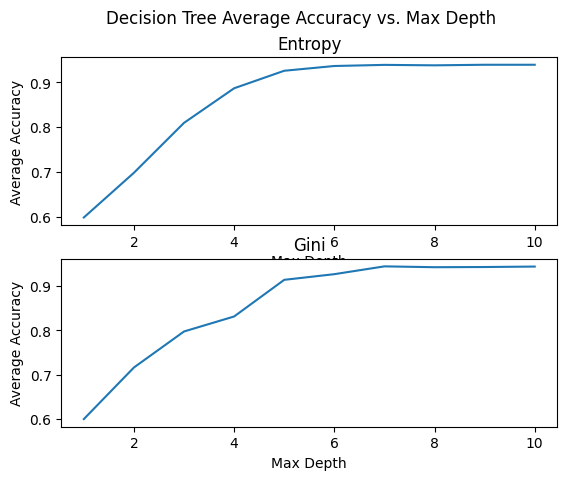

In [ ]:
fig, axs = plt.subplots(2)
fig.suptitle("Decision Tree Average Accuracy vs. Max Depth")
axs[0].plot(m_depth, avg_acc_entropy)
axs[0].title.set_text('Entropy')
axs[0].set_xlabel('Max Depth')
axs[0].set_ylabel('Average Accuracy')
axs[1].plot(m_depth, avg_acc_gini)
axs[1].title.set_text("Gini")
axs[1].set_xlabel("Max Depth")
axs[1].set_ylabel("Average Accuracy")
plt.show()